In [1]:
# Assignment ANN & SVM
# Malik Naufal Dwiyanto
# 2301980530

In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# for Decicion Boundaries

def plot_decicion_boundary(clf, x, y, cmap='Paired_r'):
  h = 0.02
  x_min, x_max = x.iloc[:, 0].min() - 10*h, x.iloc[:, 0].max() + 10*h
  y_min, y_max = x.iloc[:, 1].min() - 10*h, x.iloc[:, 1].max() + 10*h
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  
  z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)

  plt.figure(figsize=(5,5))
  plt.contourf(xx, yy, z, cmap=cmap, alpha=0.25)
  plt.contour(xx, yy, z, colors='k', linewidths=1)
  plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, cmap=cmap, edgecolors='k')

In [4]:
# importing dataset
# saya mengubah class c1 menjai 0 dan class c2 menjadi 1

from pandas import read_csv

data = read_csv('./dataset.csv')
data = pd.DataFrame(data=data)

data.head(20)

,x1,x2,target
0,4.1,1.3,0
1,4.2,1.3,0
2,4.3,1.3,0
3,4.4,1.4,0
4,4.5,1.6,0
5,4.6,1.4,0
6,4.7,1.2,0
7,4.7,1.5,0
8,4.8,1.4,0
9,4.9,1.5,0


In [5]:
data.describe()

,x1,x2,target
count,20.000000,20.000000,20.000000
mean,5.030000,1.765000,0.500000
std,0.598331,0.428308,0.512989
min,4.100000,1.200000,0.000000
25%,4.575000,1.400000,0.000000
50%,5.000000,1.700000,0.500000
75%,5.500000,2.125000,1.000000
max,6.100000,2.500000,1.000000


In [6]:
data.nunique()

x1        17
x2        12
target     2
dtype: int64

<AxesSubplot:xlabel='x1', ylabel='x2'>

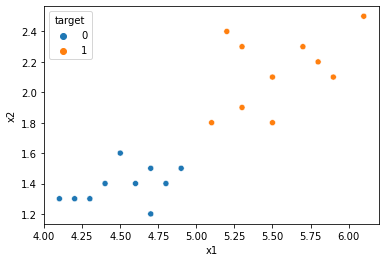

In [7]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue=data['target'], data=data)

In [8]:
# Splitting Train - Test Data

from sklearn.model_selection import train_test_split

feature_names = [index for index, value in data.iteritems()]

feature_names.remove('target')

x = data[feature_names]
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 2)
(2, 2)
(18,)
(2,)


In [10]:
# ANN - Multi Layer Perceptron

from keras.models import sequential
from keras.layers import Dense
from keras import initializers
from keras.initializers import random_uniform

init = random_uniform(minval=-1, maxval=1, seed=None)

model = sequential.Sequential()
model.add(Dense(units=2, input_dim=2, kernel_initializer=init, activation='sigmoid', name='inputLayer'))
model.add(Dense(units=1, activation='sigmoid', name='outputLayer'))


In [11]:
from tensorflow import keras
from tensorflow.keras import optimizers

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

SyntaxError: invalid syntax (Temp/ipykernel_3804/714584574.py, line 3)

In [ ]:
MLP_result = model.fit(x_train, y_train, epochs=10)

In [ ]:
MLP_eval = model.evaluate(x_test, y_test)

In [ ]:
from sklearn.model_selection import learning_curve

# train_sizes, train_score, test_score = learning_curve(model, x_train, y_train, cv=2, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# train_mean = np.mean(train_score, axis=1)
# train_std = np.std(train_score, axis=1)

# test_mean = np.mean(test_score, axis=1)
# test_std = np.std(test_score, axis=1)

# plt.subplots(1, figsize=(10, 10))
# plt.plot(train_sizes, train_mean, label='Training Score')
# plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# plt.title("Learning Curve")
# plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
# plt.tight_layout()
# plt.show()

In [ ]:
plt.plot(MLP_result.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MLP Accuracy')

In [ ]:
plt.plot(MLP_result.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Loss')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# MLP_predict = model.predict(x_test)

# # precision_recall_fscore_support(y_true=y_test, y_pred=MLP_predict, average='macro')

In [ ]:
# ANN MLP
# untuk penggunaan 2 layer MLP dataset yang disediakan sangatlah sedikit
# jumlah training yang disarankan yaitu 10 epoch sepertinya sangat kurang 
# ketika dilakukan tes dengan 200 mendapatkan akurasi yang cukup memuaskan

In [ ]:
# Support Vector Machine linear

from sklearn.svm import SVC

SVM = SVC(kernel='linear')

SVM.fit(x_train, y_train)

evaluate_model = {}

In [ ]:
plot_decicion_boundary(SVM, x_train, y_train)

In [ ]:
train_sizes, train_score, test_score = learning_curve(SVM, x_train, y_train, cv=2, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 11))

train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

plt.subplots(1, figsize=(5, 5))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
SVM_predic = SVM.predict(x_test)

metric_SVM = precision_recall_fscore_support(y_true=y_test, y_pred=SVM_predic, average='macro')
evaluate_model['SVM Linear'] = metric_SVM

In [ ]:
# SVM with soft margin and C 50

from sklearn.svm import SVC

SVM2 = SVC(kernel='linear', C=50, )

SVM2.fit(x_train, y_train)

In [ ]:
# plot decicion boundary for SVM c50 

plot_decicion_boundary(SVM2, x_train, y_train)

In [ ]:
train_sizes, train_score, test_score = learning_curve(SVM2, x_train, y_train, cv=2, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

plt.subplots(1, figsize=(5, 5))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
SVM2_predic = SVM.predict(x_test)

mectric_SVM2 = precision_recall_fscore_support(y_true=y_test, y_pred=SVM2_predic, average='macro')
evaluate_model['SVM Soft-Margin Linear C50'] = mectric_SVM2

In [ ]:
# Performance 2 SVM Model

SVM_eval = pd.DataFrame(evaluate_model, index=['precicion', 'recall', 'f1', 'support'])
SVM_eval.plot.barh()

In [ ]:
# Kesimpulan SVM:
# SVM merupakan model pembelajaran mesin dengan performa terbaik untuk melakukan klasifikasi 2 kelas
# tanpa melakukan modifikasi pada linear SVM model sudah mendapatkan performa yang memuaskan meskipun mengalami overfitting